In [50]:
#imports
import os
from six.moves import urllib
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from statsmodels import robust
from sklearn.compose import ColumnTransformer, make_column_transformer

In [51]:
DOWNLOAD_ROOT = "http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening"
CREDIT_DATA_URL = DOWNLOAD_ROOT + "/crx.data"
CREDIT_DATA_PATH = "datasets/credit-screening"

In [52]:
# fetch data from its origin
def fetch_credit_crad_data(credit_data_url=CREDIT_DATA_URL, credit_path=CREDIT_DATA_PATH):
    if not os.path.isdir(credit_path):
        os.makedirs(credit_path)
    credit_data_path = os.path.join(credit_path, "crx.data")
    urllib.request.urlretrieve(credit_data_url, credit_data_path)

fetch_credit_crad_data()

In [53]:
def load_credit_card_data(credit_data_path=CREDIT_DATA_PATH):
    csv_path=os.path.join(credit_data_path, "crx.data")
    pd.set_option('display.max_columns', None)
    col_names = ["Gender","Age","Debt","Married","BankCustomer","EducationLevel","Ethnicity","YearsEmployed","PriorDefault","Employed","CreditScore", "DriversLicense", "Citizen", "ZipCode", "Income" , "ApprovalStatus"]
    return pd.read_csv(csv_path, header=None, names=col_names)

data = load_credit_card_data()
dataset = data.copy()
dataset.head().T

,0,1,2,3,4
Gender,b,a,a,b,b
Age,30.83,58.67,24.50,27.83,20.17
Debt,0,4.46,0.5,1.54,5.625
Married,u,u,u,u,u
BankCustomer,g,g,g,g,g
EducationLevel,w,q,q,w,w
Ethnicity,v,h,h,v,v
YearsEmployed,1.25,3.04,1.5,3.75,1.71
PriorDefault,t,t,t,t,t
Employed,t,t,f,t,f


In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Gender            690 non-null object
Age               690 non-null object
Debt              690 non-null float64
Married           690 non-null object
BankCustomer      690 non-null object
EducationLevel    690 non-null object
Ethnicity         690 non-null object
YearsEmployed     690 non-null float64
PriorDefault      690 non-null object
Employed          690 non-null object
CreditScore       690 non-null int64
DriversLicense    690 non-null object
Citizen           690 non-null object
ZipCode           690 non-null object
Income            690 non-null int64
ApprovalStatus    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


In [55]:
dataset['CreditScore'].value_counts().sort_values(ascending=True)

67      1
19      1
13      1
40      1
23      1
20      2
17      2
16      3
15      4
10      8
12      8
14      8
8      10
9      10
4      15
7      16
5      18
11     19
6      23
3      28
2      45
1      71
0     395
Name: CreditScore, dtype: int64

In [56]:
#replace some values so it makes sense
dataset = dataset.replace("?", np.nan).replace('+', 1).replace('-', 0)

#drop all row which have at least one null value
dataset.dropna(inplace=True)
dataset.isna().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

In [57]:
dataset['Age'] = dataset['Age'].astype('float')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 16 columns):
Gender            653 non-null object
Age               653 non-null float64
Debt              653 non-null float64
Married           653 non-null object
BankCustomer      653 non-null object
EducationLevel    653 non-null object
Ethnicity         653 non-null object
YearsEmployed     653 non-null float64
PriorDefault      653 non-null object
Employed          653 non-null object
CreditScore       653 non-null int64
DriversLicense    653 non-null object
Citizen           653 non-null object
ZipCode           653 non-null object
Income            653 non-null int64
ApprovalStatus    653 non-null int64
dtypes: float64(3), int64(3), object(10)
memory usage: 86.7+ KB


In [58]:
dataset['ApprovalStatus'].value_counts()

0    357
1    296
Name: ApprovalStatus, dtype: int64

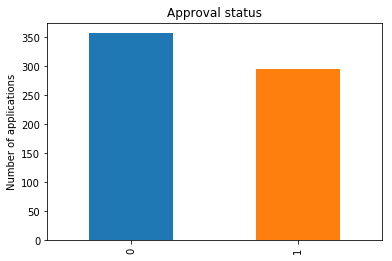

In [59]:
CountStatus = pd.value_counts(dataset['ApprovalStatus'].values, sort=False)
plt.ylabel('Number of applications')
plt.title('Approval status')
CountStatus.plot.bar()

In [60]:
# convert dataset_dropNa cat attributes to numeric
le = preprocessing.LabelEncoder()

for col in dataset:
    if dataset[col].dtypes == 'object':
        dataset[col]=le.fit_transform(dataset[col])
dataset.dtypes

Gender              int32
Age               float64
Debt              float64
Married             int32
BankCustomer        int32
EducationLevel      int32
Ethnicity           int32
YearsEmployed     float64
PriorDefault        int32
Employed            int32
CreditScore         int64
DriversLicense      int32
Citizen             int32
ZipCode             int32
Income              int64
ApprovalStatus      int64
dtype: object

In [61]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 16 columns):
Gender            653 non-null int32
Age               653 non-null float64
Debt              653 non-null float64
Married           653 non-null int32
BankCustomer      653 non-null int32
EducationLevel    653 non-null int32
Ethnicity         653 non-null int32
YearsEmployed     653 non-null float64
PriorDefault      653 non-null int32
Employed          653 non-null int32
CreditScore       653 non-null int64
DriversLicense    653 non-null int32
Citizen           653 non-null int32
ZipCode           653 non-null int32
Income            653 non-null int64
ApprovalStatus    653 non-null int64
dtypes: float64(3), int32(10), int64(3)
memory usage: 61.2 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026AA9643FD0>,
      dtype=object)

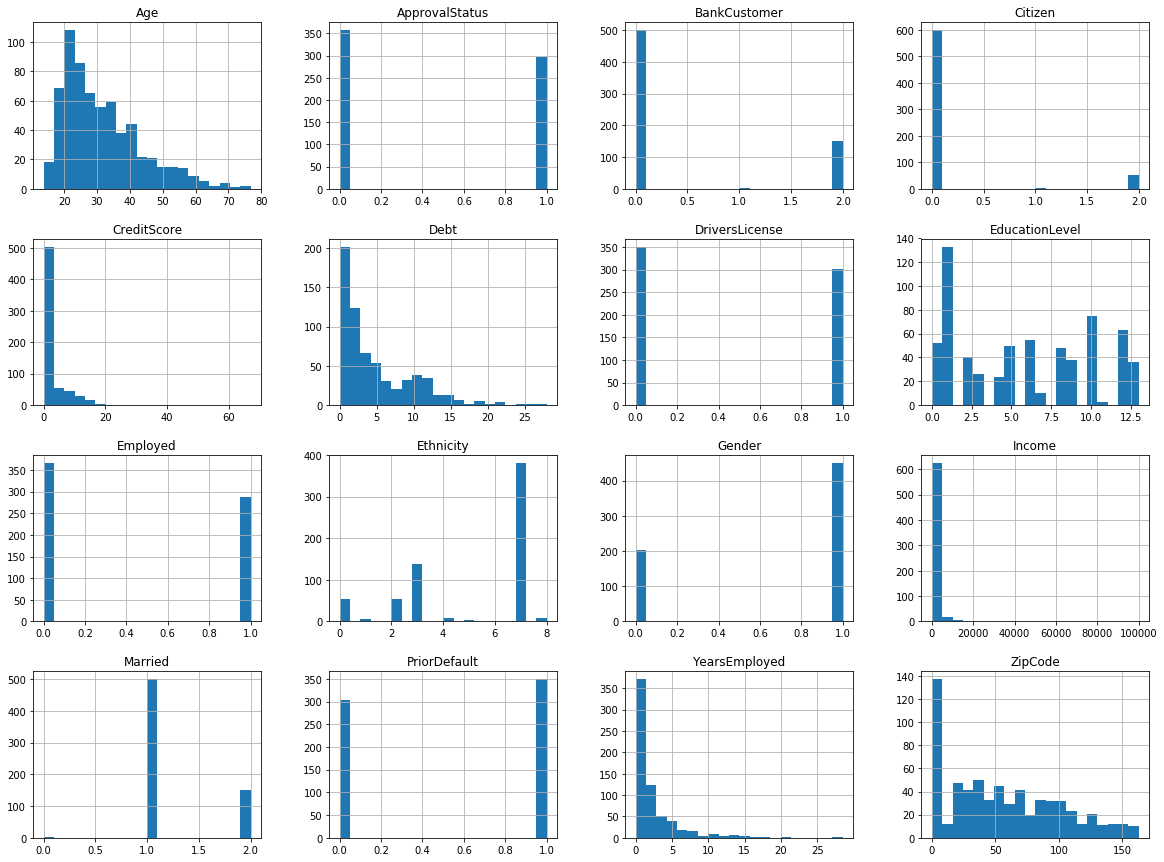

In [62]:
dataset.hist(bins=20, figsize=(20,15))

In [63]:
corr = dataset.corr()
corr

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
Gender,1.000000,0.042177,-0.034906,0.066742,0.063122,-0.011568,0.057212,0.084899,-0.023251,-0.065192,-0.016683,0.052315,0.081948,0.109199,0.013099,-0.019817
Age,0.042177,1.000000,0.217681,-0.091395,-0.105122,0.023282,-0.189454,0.417647,0.218637,0.103633,0.198153,0.058133,-0.021586,-0.090538,0.029078,0.180252
Debt,-0.034906,0.217681,1.000000,-0.102243,-0.089745,0.009221,-0.030666,0.300600,0.236751,0.166092,0.269834,-0.006083,-0.105181,-0.266549,0.119754,0.207086
Married,0.066742,-0.091395,-0.102243,1.000000,0.981080,-0.045024,-0.021015,-0.089650,-0.116015,-0.158118,-0.104061,-0.009850,-0.037934,-0.001085,-0.118505,-0.179700
BankCustomer,0.063122,-0.105122,-0.089745,0.981080,1.000000,-0.051335,-0.026003,-0.081862,-0.129090,-0.169691,-0.110822,0.001747,-0.011931,0.013922,-0.018528,-0.169976
EducationLevel,-0.011568,0.023282,0.009221,-0.045024,-0.051335,1.000000,-0.000935,0.032704,0.105197,0.112155,-0.002706,0.069720,0.017234,0.107930,-0.006700,0.123314
Ethnicity,0.057212,-0.189454,-0.030666,-0.021015,-0.026003,-0.000935,1.000000,-0.094978,-0.034977,-0.001452,-0.037329,-0.004235,0.042494,-0.019605,-0.022527,-0.011023
YearsEmployed,0.084899,0.417647,0.300600,-0.089650,-0.081862,0.032704,-0.094978,1.000000,0.336148,0.228035,0.327325,0.139317,-0.001762,-0.093188,0.052159,0.332728
PriorDefault,-0.023251,0.218637,0.236751,-0.116015,-0.129090,0.105197,-0.034977,0.336148,1.000000,0.430586,0.378264,0.089864,-0.110474,-0.064796,0.084427,0.738829
Employed,-0.065192,0.103633,0.166092,-0.158118,-0.169691,0.112155,-0.001452,0.228035,0.430586,1.000000,0.569176,0.020223,-0.233452,-0.070939,0.068189,0.451866


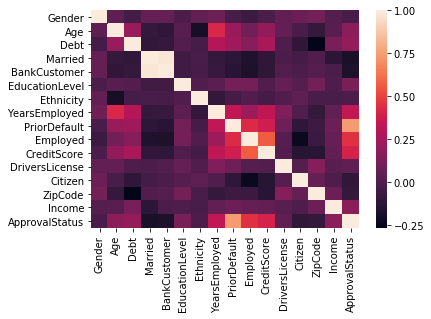

In [64]:
def make_corr_heatmap(data, corr):
    sns.heatmap(corr, 
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)

make_corr_heatmap(dataset, corr)

In [65]:
corr['ApprovalStatus'].sort_values(ascending=False)

ApprovalStatus    1.000000
PriorDefault      0.738829
Employed          0.451866
CreditScore       0.406052
YearsEmployed     0.332728
Debt              0.207086
Age               0.180252
Income            0.172766
EducationLevel    0.123314
DriversLicense    0.050011
Ethnicity        -0.011023
Gender           -0.019817
ZipCode          -0.092483
Citizen          -0.100785
BankCustomer     -0.169976
Married          -0.179700
Name: ApprovalStatus, dtype: float64

In [66]:
dataset_dropColumns = dataset.drop(columns=['Ethnicity', 'Gender', 'ZipCode'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026AAFC33EB8>,
      dtype=object)

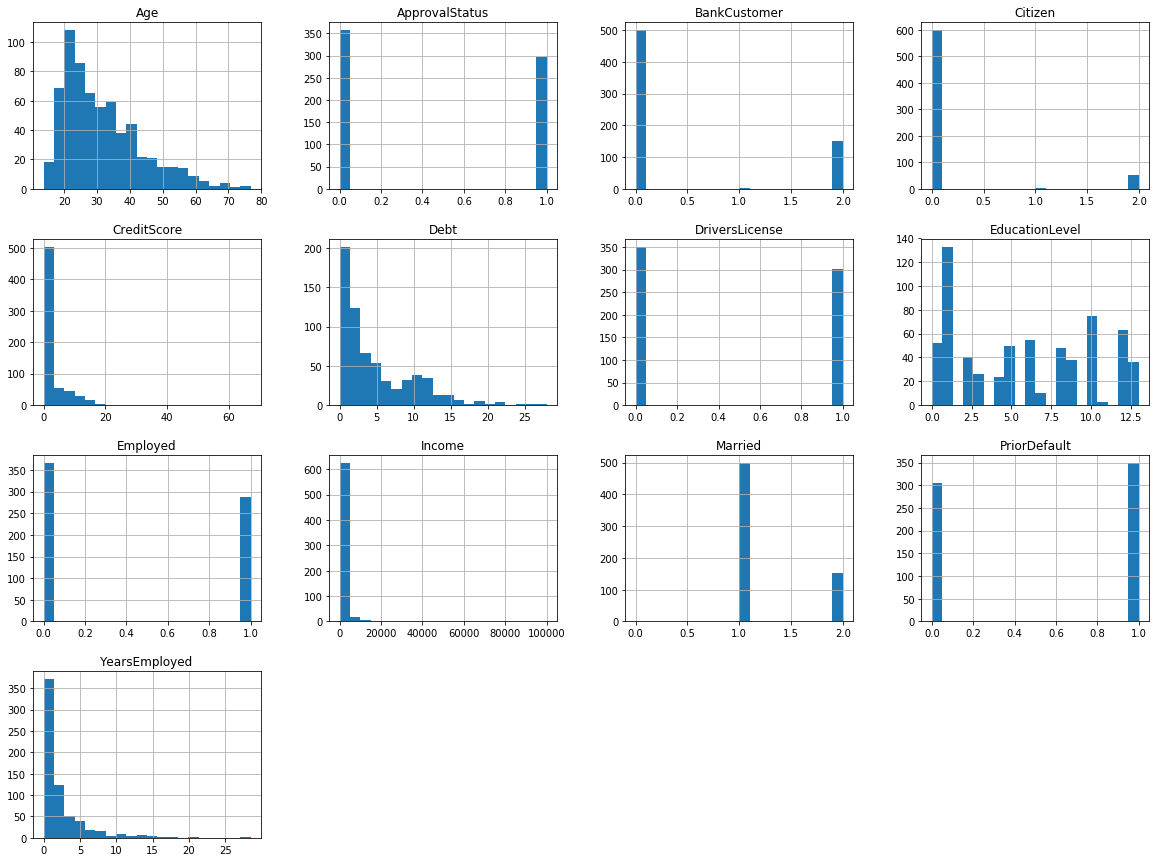

In [67]:
dataset_dropColumns.hist(bins=20, figsize=(20, 15))

In [68]:
dataset_dropColumns['Married'].value_counts()

1    499
2    152
0      2
Name: Married, dtype: int64

In [69]:
dataset_Married_3_values = dataset_dropColumns[dataset_dropColumns['Married'] == 0]
dataset_Married_3_values.head()

,Age,Debt,Married,BankCustomer,EducationLevel,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,ApprovalStatus
317,17.50,22.000,0,1,5,0.0,0,0,0,1,1,100000,1
321,18.08,0.375,0,1,2,10.0,0,0,0,1,2,0,1


In [70]:
dataset_dropColumns = dataset_dropColumns[dataset_dropColumns['Married'] != 0]
dataset_dropColumns['Married'].value_counts()

1    499
2    152
Name: Married, dtype: int64

In [71]:
dataset_dropColumns[dataset_dropColumns['CreditScore']<8]['CreditScore'].value_counts().sum()

572

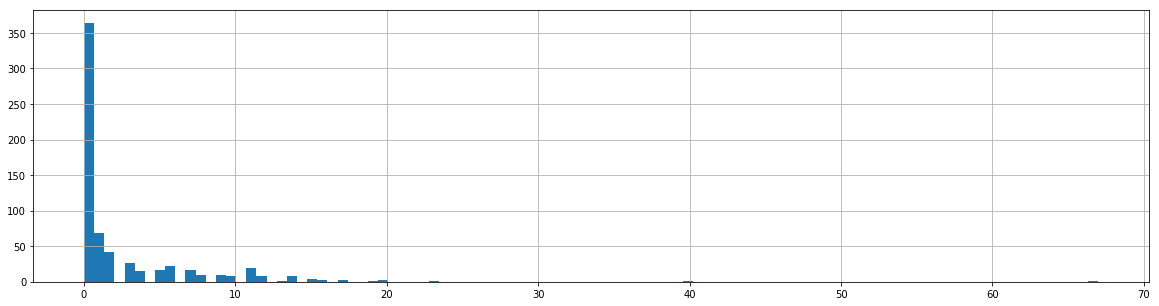

In [72]:
dataset_dropColumns['CreditScore'].hist(bins=100, figsize=(20, 5))

In [73]:
dataset_dropColumns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 0 to 689
Data columns (total 13 columns):
Age               651 non-null float64
Debt              651 non-null float64
Married           651 non-null int32
BankCustomer      651 non-null int32
EducationLevel    651 non-null int32
YearsEmployed     651 non-null float64
PriorDefault      651 non-null int32
Employed          651 non-null int32
CreditScore       651 non-null int64
DriversLicense    651 non-null int32
Citizen           651 non-null int32
Income            651 non-null int64
ApprovalStatus    651 non-null int64
dtypes: float64(3), int32(7), int64(3)
memory usage: 53.4 KB


In [74]:
# one hot encoding 'Citizen', 'Married', 'BankCustomer'

preprocess = make_column_transformer((OneHotEncoder(categories='auto'), ['Citizen', 'Married', 'BankCustomer']))

In [75]:
dataset_dropColumns_nominal = preprocess.fit_transform(dataset_dropColumns)

In [76]:
dataset_dropColumns_nominal

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [78]:
dataset_dropColumns=dataset_dropColumns.drop(columns=['Citizen', 'Married', 'BankCustomer'])

In [80]:
dataset_dropColumns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 0 to 689
Data columns (total 10 columns):
Age               651 non-null float64
Debt              651 non-null float64
EducationLevel    651 non-null int32
YearsEmployed     651 non-null float64
PriorDefault      651 non-null int32
Employed          651 non-null int32
CreditScore       651 non-null int64
DriversLicense    651 non-null int32
Income            651 non-null int64
ApprovalStatus    651 non-null int64
dtypes: float64(3), int32(4), int64(3)
memory usage: 45.8 KB


In [81]:
dataset_1hot = np.concatenate((dataset_dropColumns_nominal,dataset_dropColumns.iloc[0:, 0:]),axis=1)

In [83]:
dataset_1hot

array([[  1.,   0.,   0., ...,   0.,   0.,   1.],
       [  1.,   0.,   0., ...,   0., 560.,   1.],
       [  1.,   0.,   0., ...,   0., 824.,   1.],
       ...,
       [  1.,   0.,   0., ...,   1.,   1.,   0.],
       [  1.,   0.,   0., ...,   0., 750.,   0.],
       [  1.,   0.,   0., ...,   1.,   0.,   0.]])

In [89]:
df_1hot = pd.DataFrame(data=dataset_1hot[0:, 0:])

In [90]:
df_1hot.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,30.83,0.000,12.0,1.25,1.0,1.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,58.67,4.460,10.0,3.04,1.0,1.0,6.0,0.0,560.0,1.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,24.50,0.500,10.0,1.50,1.0,0.0,0.0,0.0,824.0,1.0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,27.83,1.540,12.0,3.75,1.0,1.0,5.0,1.0,3.0,1.0
4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,20.17,5.625,12.0,1.71,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# divide to 3 set
#target column shouldn't be changed
#give labels after one hot encoding